The task for this exercise is to learn the classification of MNIST digits by using SVD decomposition.
Remember that, Given a matrix X ∈ R m×n and its SVD decomposition X = USV T we can prove that an orthogonal base for the space of the columns is given by the first p columns of the matrix U, where
p = rank(X) is equal to the number of non-zero singular values of A.

• Load the MNIST dataset contained in ./data/MNIST.mat with the function scipy.io.loadmat. <br>
This dataset, which is loaded in the form of a 256 ×1707 matrix X, contains the flattened version
of 1707 16 × 16 grayscale handwritten digits. <br>
Moreover, from the same file it is possible to load a vector I of length 1707 such that the i-th element of I is the true digit represented by the i-th
image of X.

In [51]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

In [19]:

dataset = scipy.io.loadmat('MNIST.mat')

# Estrazione matrice X delle immagini e vettore I delle label

X = dataset['X']
I = dataset['I']

print(X)
print(I)

print("Dimensioni della matrice X:", X.shape)
print("Dimensioni del vettore I:", I.shape)




[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.1645 0.     ... 0.     0.     0.    ]
 [0.     0.086  0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
[[6 5 4 ... 7 9 8]]
Dimensioni della matrice X: (256, 1707)
Dimensioni del vettore I: (1, 1707)


 - Visualize a bunch of datapoints of X with the function plt.imshow. <br>
  -Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the
classes C1 and C2 defined above.

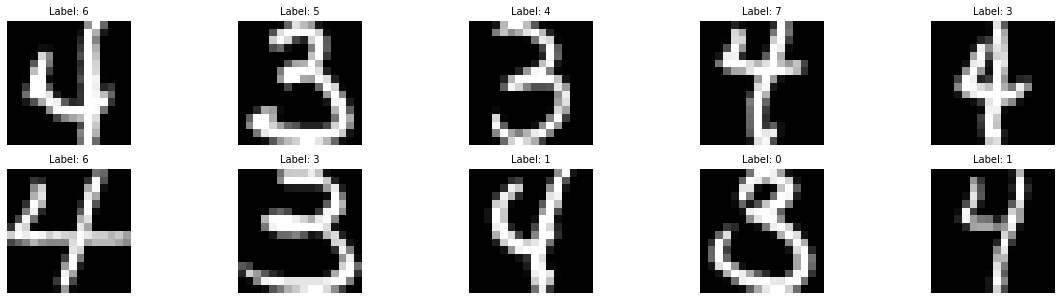

In [28]:
plt.figure(figsize=(20, 5))
for i in range(10):
    plt.subplot(2,5,i+1)
    # reshape the column vector in a matrix 16x16
    image = X[:,i].reshape(16,16)
    plt.imshow(image, cmap='gray')  
    plt.title(f"Label: {I[0][i]}", fontsize=10)  
    plt.axis('off')  

plt.show()


• Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the classes C1 and C2 defined above.

In [43]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']

digits_cols = [i for i in range(X.shape[1]) if I[0][i] == 3 or I[0][i] == 4]
print(len(digits_cols))
X = X[:,digits_cols]
print(X)
print(X.shape)

I = I[:,digits_cols]
print(I)
print(I.shape)

        


253
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.0585 0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
(256, 253)
[[4 3 3 4 4 4 3 4 3 4 3 4 4 4 3 4 3 3 3 4 4 4 3 3 4 3 4 4 3 4 4 4 4 4 3 3
  4 4 3 3 4 4 4 3 3 3 4 4 4 4 4 3 3 3 4 4 3 4 3 4 4 3 4 3 4 3 3 4 4 3 4 3
  3 3 3 4 3 3 3 4 3 4 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3 3 3 3 3 4 4 3 4 3 4
  3 4 3 4 3 3 4 4 4 4 3 3 4 3 4 3 4 3 3 4 3 4 4 3 4 3 4 4 4 4 4 3 4 4 3 4
  4 4 3 4 3 4 4 4 3 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 3 4 4 4 4
  4 4 4 3 4 3 3 4 4 3 3 3 3 3 3 3 4 3 3 3 3 4 4 3 3 3 3 4 3 4 4 3 3 3 3 4
  3 3 3 4 3 3 3 3 3 3 3 4 3 4 4 3 3 3 3 3 4 4 3 3 3 3 4 3 3 3 4 3 3 3 4 3
  3]]
(1, 253)


Split the obtained dataset in training and testing. From now on, we will only consider the training
set. The test set will be only used at the end of the exercise to test the algorithm.

In [38]:
# I'm going to use a 80% of data in the dataset X for the train and 20% for the test.


train_elements = int(X.shape[1] * 0.8)


X_train = X[:,:train_elements]
Y_train = I[:,:train_elements]

X_test = X[:,train_elements:]
Y_test = I[:,train_elements:]

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(256, 202) (1, 202) (256, 51) (1, 51)


• Create the matrices X1 and X2 defined above from X.

In [48]:
class_c1 = [i for i in range(X.shape[1]) if I[0][i] == 3]
class_c2 = [i for i in range(X.shape[1]) if I[0][i] == 4]
print(len(class_c1))
print(len(class_c2))

X1 = X[:,class_c1]
X2 = X[:,class_c2]

print(X1.shape,X2.shape)





131
122
(256, 131) (256, 122)


• Compute the SVD decomposition of X1 and X2 with np.linalg.svd(matrix, full matrices=False) and denote the U-part of the two decompositions as U1 and U2.

In [50]:
U1, S1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, VT2 = np.linalg.svd(X2, full_matrices=False)


• Take an unknown digit y from the test set, and compute y⊥1 = U1(UT1y) and y⊥2 = U2(UT2y).

In [111]:
# Find a random index and take the image of the correspondent index 
random_idx = random.randint(0,Y_test.shape[1] - 1)
print(random_idx)
# Take the correspondent image 
y = X_test[:,random_idx:random_idx+1]
print(y.shape)


# Calculate the orthogonal distances 

y_ort_1 = U1 @ (U1.T @ y)
y_ort_2 = U2 @ (U2.T @ y)


8
(256, 1)


• Compute the distances d1 = ||y − y⊥1||2 and d2 = ||y − y⊥2||2 and classify y to C1 if d1 < d2 and to C2 if d2 < d1.

In [112]:
d1 = np.linalg.norm(y-y_ort_1,2)
d2 = np.linalg.norm(y-y_ort_2,2)

if d1 < d2:
    print("Y is a 3!")
else:
    print("Y is a 4!")

Y is a 4!


Repeat the experiment for different values of y in the test set. Compute the misclassification number for this algorithm.

In [114]:
misclassification_count = 0

for i in range(Y_test.shape[1]):

    y = X_test[:,i:i+1]
    print(I[0][i])
    y_ort_1 = U1 @ (U1.T @ y)
    y_ort_2 = U2 @ (U2.T @ y)

    d1 = np.linalg.norm(y - y_ort_1, 2)
    d2 = np.linalg.norm(y - y_ort_2, 2)

    if d1 < d2:
        classification = "C3"
    else:
        classification = "C4"

    # Verify if the classification gone wrong 
    if I[0][i] == 3:
        true_label = "C3" 
    else:
        true_label = "C4"

    if classification != true_label:
        misclassification_count += 1

# Print the number of misclassification
print(f"Number of experiment done: {Y_test.shape[1]}")
print(f"Number of misclassifications: {misclassification_count}")


4
3
3
4
4
4
3
4
3
4
3
4
4
4
3
4
3
3
3
4
4
4
3
3
4
3
4
4
3
4
4
4
4
4
3
3
4
4
3
3
4
4
4
3
3
3
4
4
4
4
4
Number of experiment done: 51
Number of misclassifications: 20


• Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error

In [134]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']

X1 = X[:, [i for i in range(X.shape[1]) if I[0][i] == 1]]
X2 = X[:, [i for i in range(X.shape[1]) if I[0][i] == 7]]



digits_cols = [i for i in range(X.shape[1]) if I[0][i] == 1 or I[0][i] == 5]

I = I[:,digits_cols]

U1, S1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, VT2 = np.linalg.svd(X2, full_matrices=False)

misclassification_count = 0

for i in range(Y_test.shape[1]):
    y = X_test[:, i:i+1]  
    print(I[0][i])

    y_ort_1 = U1 @ (U1.T @ y)
    y_ort_2 = U2 @ (U2.T @ y)

    d1 = np.linalg.norm(y - y_ort_1, 2)
    d2 = np.linalg.norm(y - y_ort_2, 2)

    if d1 < d2:
        classification = "C1"
    else:
        classification = "C9"

    if I[0][i] == 1:
        true_label = "C1" 
    else:
        true_label = "C9"
     

    if classification != true_label:
        misclassification_count += 1

# Stampa il numero di misclassificazioni
print(f"Number of experiment done: {Y_test.shape[1]}")
print(f"Numero di misclassificazioni: {misclassification_count}")


5
1
1
1
1
1
1
1
5
1
1
1
1
1
5
1
1
1
1
5
1
5
5
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
5
5
5
1
5
1
1
1
5
1
Number of experiment done: 51
Numero di misclassificazioni: 12


# CREA UNA CELL PER L'ESAME DOVE FAI METTERE IN INPUT I VALORI DELLE DIGIT E CALCOLA TUTTO LUI 
Tassi di misclassificazione: Inizia con l'analisi dei tassi di misclassificazione. Quanti casi sono stati classificati correttamente e quanti sono stati classificati erroneamente? Questi tassi ti daranno un'idea iniziale delle prestazioni del tuo algoritmo.

Fattori di classificazione: Esamina i motivi delle misclassificazioni. Ad esempio, potresti scoprire che alcune immagini di un certo numero sono spesso confuse con un altro numero. Questo può fornire indicazioni sulla similitudine visiva tra i numeri coinvolti.

Tassi di errore: Calcola il tasso di errore complessivo per il tuo algoritmo. Questo ti dirà quanto bene o quanto male sta funzionando l'approccio di classificazione.

Influenza dei dati di addestramento: Considera come le dimensioni del tuo set di addestramento influenzano le prestazioni. Se hai un set di addestramento più grande, ottieni risultati migliori? Oppure, se hai un set di addestramento più piccolo, le prestazioni peggiorano?

Influenza dei parametri: Se hai utilizzato parametri specifici nel tuo algoritmo di classificazione, come la scelta del numero di componenti principali nell'analisi SVD, esamina come questi parametri influenzano le prestazioni. Ci sono valori ottimali per questi parametri?

Similitudine visiva: Valuta se ci sono delle somiglianze visive tra i numeri che influenzano le misclassificazioni. Ad esempio, i numeri 1 e 7 potrebbero essere scambiati più spesso perché hanno caratteristiche simili nella scrittura manuale.

Potenziamento delle prestazioni: Se hai scoperto che il tuo algoritmo ha un alto tasso di errore o fa misclassificazioni comuni, considera come potresti migliorare le prestazioni. Questo potrebbe includere l'aggiunta di ulteriori caratteristiche, l'ottimizzazione dei parametri o l'utilizzo di un algoritmo di classificazione diverso.

Conclusioni: Alla fine, trai delle conclusioni basate sui risultati che hai ottenuto. Cosa hai imparato dal tuo esperimento? Quali sono le sfide principali nella classificazione dei numeri? Come potresti migliorare ulteriormente il tuo approccio?

In generale, il commento dei risultati è un passaggio essenziale per comprendere appieno l'efficacia del tuo algoritmo e per identificare le aree in cui è possibile apportare miglioramenti.

The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, k different classes) C1, . . . , Ck, we just need to repeat the same procedure as before for each matrix X1, . . . , Xk to obtain the distances d1, . . . , dk. Then, the new digit y will be classified as Ci if di is lower that dj for each j = 1, . . . , k.
Repeat the exercise above with a 3-digit example. Comment the differences.